# Equidade em Aprendizado de Máquina


Conjunto de dados: Adult Data Set (Disponível em: http://archive.ics.uci.edu/ml/datasets/adult e de domínio público). Este conjunto de dados é formado por 14 atributos, tanto categóricos quanto atributos numéricos, anonimizado. Dentre estes atributos temos idade, tipo de trabalho, gênero, etnia, estado civil, horas trabalhadas por semana entre outros. Para cada indivíduo do conjunto de dados, temos um rótulo, indicando uma renda anual superior (igual) a $50 k ou inferior a este limiar.   

Contudo, existe uma inequidade entre a distribuição de indivíduos de "Alta Renda" e "Baixa Renda" entre as populações masculina e feminina, bem como entre a população branca e não-branca. 



In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import os


In [2]:
def add_header(header, file, output_name):
    #function to add a header to a csv file
    import csv
    
    with open(file, 'rt') as input_file:
        reader = csv.reader(input_file)
        data_list = list(reader)
    
    with open(output_name, 'wt', newline ='') as output_file:
        writer = csv.writer(output_file, delimiter=',')
        writer.writerow(i for i in header)
        for j in data_list:
            writer.writerow(j)      

In [3]:
# Adicionando cabecalho aos dados

header = ["Age", "Workclass", "Fnlwgt", "Education", "Education-num", "Marital Status", "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per Week", "Native Country", "Annual Gain"]
file = "../data/adult-data.csv"
output_name = "../data/adultdataset.csv"
add_header(header, file, output_name)

In [4]:
#Abrindo o conjunto de dados

adult_data = pd.read_csv("../data/adultdataset.csv", sep=',')
adult_data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Annual Gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Como podemos perceber, o ganho anual, variável que define as classes do nosso problema, ainda está em formato textual. Deste modo, precisamos tornar as classes do nosso problema numéricas (0, 1).

In [5]:
# Binarizacao das classes
le = preprocessing.LabelEncoder()
le.fit(adult_data['Annual Gain'])
le.classes_
adult_data['Annual Gain'] = le.transform(adult_data['Annual Gain'])
adult_data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Annual Gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## População Completa

Vamos agora, visualizar um pouco os dados. Inicialmente, vamos analisar a proporção de indivíduos com alta renda (>= 50K) na população completa.

Percentual de alta renda (populacao completa): 
 24.080955744602438 %


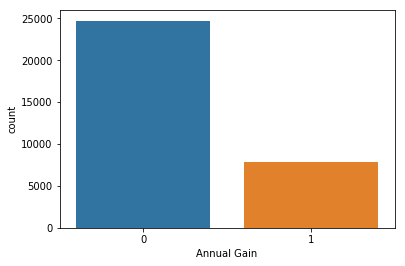

In [6]:
sns.countplot(adult_data['Annual Gain'])

adult_1 = sum(adult_data['Annual Gain']==1)

adult_0 = sum(adult_data['Annual Gain']==0)

ratio = adult_1/(adult_0 + adult_1)
print('Percentual de alta renda (populacao completa): \n', ratio*100, '%')

Vamos agora dividir a nossa população entre a população masculina e feminina

## Análise das Populações Masculina e Feminina

Percentual de homens na população: 
 66.92054912318419 %
Percentual de mulheres na população: 
 33.07945087681583 %


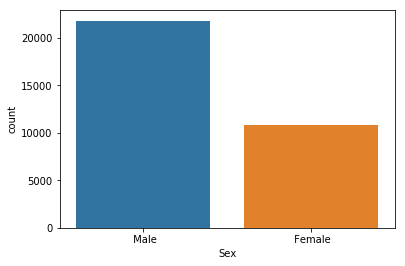

In [7]:
sns.countplot(adult_data['Sex'])

num_male = sum(adult_data['Sex']== ' Male')

num_female = sum(adult_data['Sex']== ' Female')

male_ratio = num_male/(num_male+num_female)
female_ratio = num_female/(num_male+num_female)

print('Percentual de homens na população: \n', male_ratio*100, '%')
print('Percentual de mulheres na população: \n', female_ratio*100, '%')

Do gráfico acima, podemos notar que existe um número consideravelmente de dados referentes a homens na população do que o número de dados associados. Em um paradigma tradicional de Aprendizado de Máquina, um número maior de padrões de entrada relacionado a homens será apresentado ao modelo, o que pode polarizar a tarefa de classificação.

In [8]:
# Populacao Feminina
is_female = adult_data.Sex == ' Female'
is_female.head()
female_data = adult_data[is_female]
female_data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Annual Gain
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0


In [9]:
#Populacao Masculina
is_male = adult_data.Sex == ' Male'
is_male.head()
male_data = adult_data[is_male]
male_data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Annual Gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1


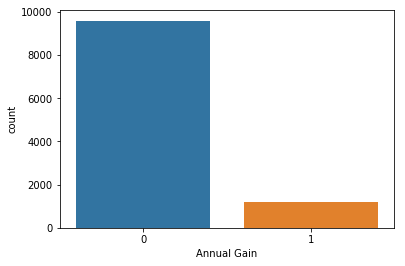

In [10]:
sns.countplot(female_data['Annual Gain'])

In [11]:
female_1 = sum(female_data['Annual Gain']==1)

female_0 = sum(female_data['Annual Gain']==0)

female_ratio_high = female_1/(female_0 + female_1)
print('Percentual de alta renda (populacao feminina): \n', female_ratio_high*100, '%')

Percentual de alta renda (populacao feminina): 
 10.946058861758425 %


Percebemos do resultado acima que o número de indivíduos na população feminina na classe "Alta Renda" é inferior ao percentual da população como um todo.

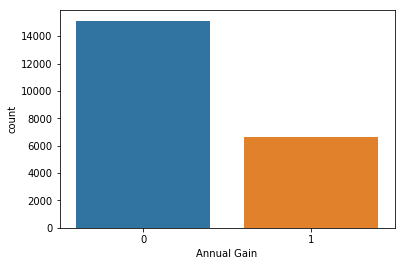

In [12]:
sns.countplot(male_data['Annual Gain'])

In [13]:
male_1 = sum(male_data['Annual Gain']==1)

male_0 = sum(male_data['Annual Gain']==0)

male_ratio_high = male_1/(male_0 + male_1)
print('Percentual de alta renda (populacao masculina): \n', male_ratio_high*100, '%')

Percentual de alta renda (populacao masculina): 
 30.573657641119777 %


Já para a população masculina, notamos um percentual superior de indivíduos com "Alta Renda", quando comparada com a população geral. Na sequência, vamos analisar como as classes "Alta Renda" e "Baixa Renda" se distribuem entre indivíduos brancos e não-brancos.

## Análise das Populações Branca e Não-Branca

Percentual de alta renda (populacao branca): 
 25.58599367270636 %


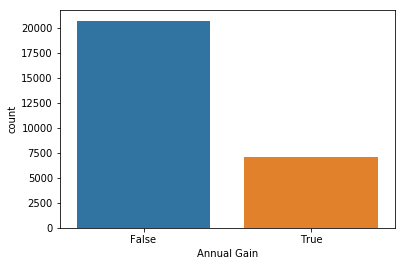

In [14]:
is_white = adult_data.Race == ' White'
white_data = adult_data[is_white]

sns.countplot(white_data['Annual Gain'] == 1)

white_1 = sum(white_data['Annual Gain']==1)
#print(white_1)

white_0 = sum(white_data['Annual Gain']==0)
#print(white_0)

white_ratio_high = white_1/(white_0 + white_1)
print('Percentual de alta renda (populacao branca): \n', white_ratio_high*100, '%')

Para o caso da população branca, notamos que o percentual de indivíduos classficados como "Alta Renda" está um pouco acima do valor correspondente à população geral.

Percentual de alta renda (populacao não-branca): 
 15.258166491043204 %


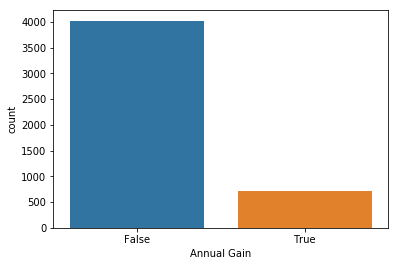

In [15]:
is_not_white = adult_data.Race != ' White'
not_white_data = adult_data[is_not_white]

sns.countplot(not_white_data['Annual Gain'] == 1)

not_white_1 = sum(not_white_data['Annual Gain']==1)

not_white_0 = sum(not_white_data['Annual Gain']==0)

not_white_ratio_high = not_white_1/(not_white_0 + not_white_1)
print('Percentual de alta renda (populacao não-branca): \n', not_white_ratio_high*100, '%')

Já para a população não-branca, notamos um percentual de "Alta Renda" inferior ao da população global.

# Metodologia 

Para a tarefa de classificação, empregaremos um classificador com regressão logística. Em nossos teste iniciais, adotaremos o atributo "Gênero" como atributo discriminatório e promoveremos a descorrelação (linear) entre este atributo e a fronteira de decisão. Para estes testes iniciais, teremos como base o trabalho "Fairness Constraints: Mechanisms for Fair Classification", Zafar, _et al._, 2017, com código disponível em https://github.com/mbilalzafar/fair-classification, sob a licença GPL 3.0.

Pelo fato da base de dados possuir tanto atributos categóricos quanto numéricos, devemos realizar uma codificação dos valores textuais (como País de origem e tipo de trabalho). 